In [1]:
#Here we go over how to make sure your colourbars aren't getting in the way, and doing the right formatting
#with them.

#We also will look at how you can approach making your own colourmap, and the different ways you can show this
#In a colourbar for the same given set of data

#Usual 3 imports you'd need. 
#%matplotlib inline simply makes sure figures are rendered properly in a notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
def somewavedata(): #Copied and pasted code from stackoverflow to make random 2D data
    f = 10         # frequency
    fs = 100       # sample frequency
    Ts = 1/fs      # sample period
    t = np.arange(0,0.5, Ts)   # time index
    c = 50             # speed of wave
    w = 2*np.pi *f     # angular frequency
    k = w/c            # wave number

    resolution = 0.02
    x = np.arange(-5, 5, resolution)
    y = np.arange(-5, 5, resolution)
    dx = np.array(x); M = len(dx)
    dy = np.array(y); N = len(dy)
    [xx, yy] = np.meshgrid(x, y);
    theta = np.pi / 4         # direction of propagation
    kx =  k* np.cos(theta)
    ky = k * np.sin(theta)
    plane_wave = np.sin(kx * xx + ky * yy - w * t[1])

    return plane_wave

In [3]:
#Here, we change our function a little so that we generate 2 subplots, and use imshow to show data on just 
#the left one. We then return the figure, each subplot and the imshow object for reasons below
def Make_The_Plots():
    Fig = plt.figure(1)
    Fig.set_size_inches(10,5)

    ax = Fig.add_subplot(121)        
    ax2 = Fig.add_subplot(122)        
    plane_wave = somewavedata()
    ims = ax.imshow(plane_wave)
    return Fig,ax,ax2,ims

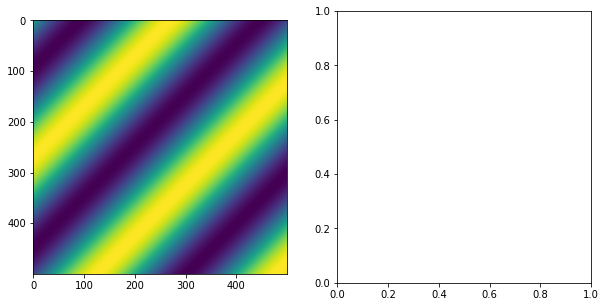

In [4]:
Fig,ax,ax2,ims = Make_The_Plots()

<ipython-input-5-762a739f1d3f>:3: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  Fig.colorbar(ims)


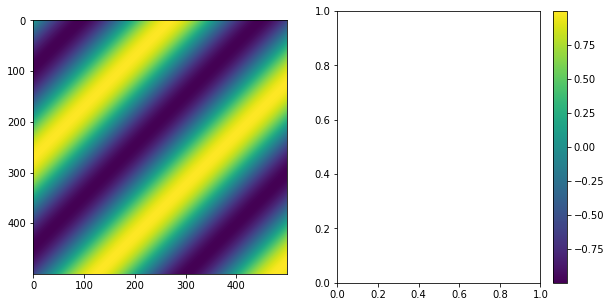

In [5]:
#The most standard way to make a colourbar. The warning is simply saying that if you don't specify otherwise
#The colourbar will remove space from the axes object to fit in. Notice how the right axes isn't square anymore
Fig.colorbar(ims)
Fig

#Obviously this colourbar below isn't quite how we want though, it's on the wrong side for starters

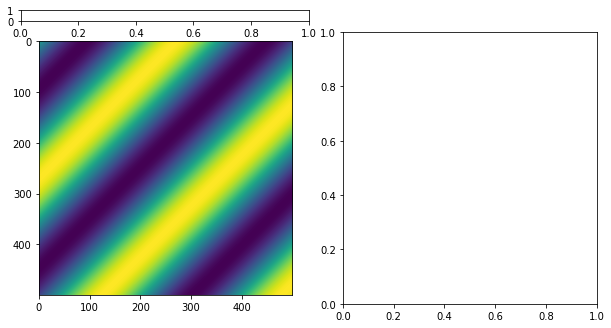

In [6]:
Fig,ax,ax2,ims = Make_The_Plots()

#Lets now create our own axes object, and force the colourbar to be drawn there
#Treat this like bbox_to_anchor, but using the total figure space (including the subplots)
cbar_ax = Fig.add_axes([0.1,0.91,0.4,0.03])
#So literally, the axes starts a 10% from the left of the figure, and 91% from the bottom
#It will then be 40% of the figure size wide, and 3% of the figure size tall

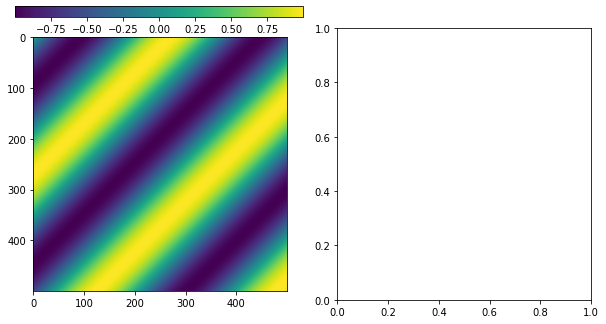

In [7]:
#Now lets draw the better colourbar!

cbar = Fig.colorbar(ims, #Defined as 'mappable', basically the plot to use for the colorbar limits
             cax=cbar_ax, #Axes object to place it in
             orientation='horizontal') #We want this to be horizon, or we'd get a very short and wide one
Fig

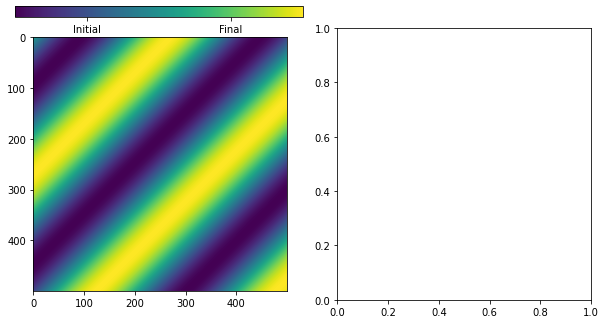

In [8]:
#You can change ticks and labels on a colourbar how you would an axes object really
cbar.set_ticks([-0.5,0.5])
cbar.set_ticklabels(['Initial','Final'])

Fig

In [9]:
#Lets try and do something else for the colourmap now. Let's make our own

#This function does exactly that, creates one from a list of colours. You can also give it rgba values too
from matplotlib.colors import LinearSegmentedColormap
collist = ['blue','green','purple','white','black']
my_cmap = LinearSegmentedColormap.from_list('',collist)

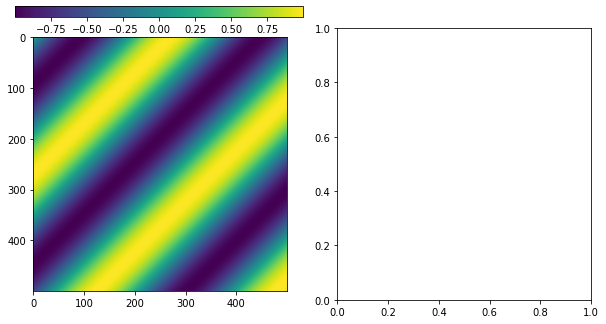

In [10]:
#Redrawing the first colourbar now
Fig,ax,ax2,ims = Make_The_Plots()
cbar_ax = Fig.add_axes([0.1,0.91,0.4,0.03])

cbar = Fig.colorbar(ims, #Defined as 'mappable', basically the plot to use for the colorbar limits
             cax=cbar_ax, #Axes object to place it in
             orientation='horizontal') #We want this to be horizontal, or we'd get a very short and wide one


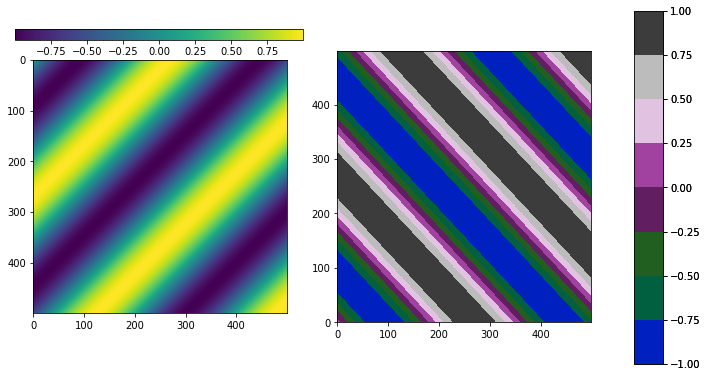

In [12]:
#And now drawing similar data, using contourf now, and our own colourmap
#contourf is different though in that it chooses discrete positions to draw another contour level.
#Notice how our colourbar isn't a smooth transition like the first, but 8 colours only
newdat = somewavedata()
cont2 = ax2.contourf(newdat,cmap=my_cmap)
cbar_ax2 = Fig.add_axes([0.96,0.01,0.04,0.98])
cbar2 = Fig.colorbar(cont2,cbar_ax2)
Fig

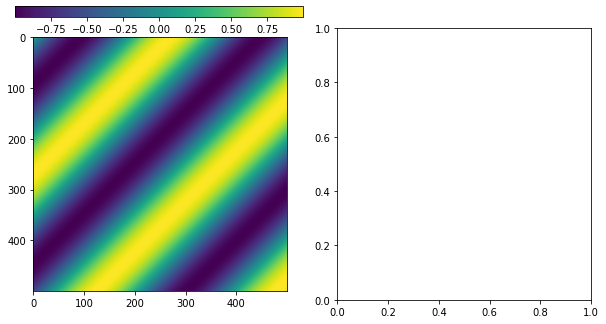

In [13]:
#Once again, resetting the figure and drawing the usual stuff on the left
Fig,ax,ax2,ims = Make_The_Plots()
cbar_ax = Fig.add_axes([0.1,0.91,0.4,0.03])

cbar = Fig.colorbar(ims, #Defined as 'mappable', basically the plot to use for the colorbar limits
             cax=cbar_ax, #Axes object to place it in
             orientation='horizontal') #We want this to be horizontal, or we'd get a very short and wide one


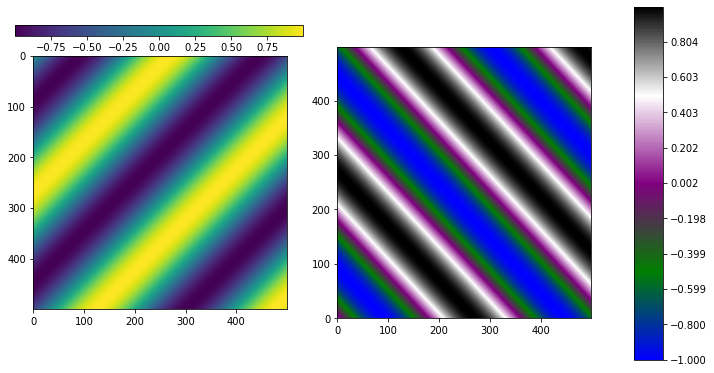

In [21]:
#Let's now tell our contour plot to have 500 contour levels using levels, it makes a smooth looking gradient now!
cont2 = ax2.contourf(newdat,cmap=my_cmap,levels = np.linspace(-1,1,500))
cbar_ax2 = Fig.add_axes([0.96,0.01,0.04,0.98])
cbar2 = Fig.colorbar(cont2,cbar_ax2)
Fig

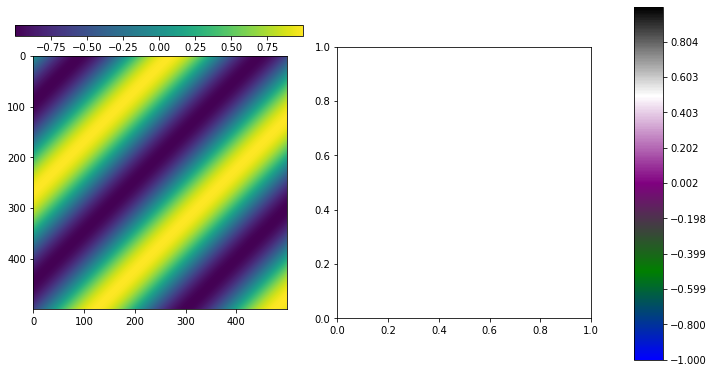

In [22]:
#We can also clear axes, and the colourbars remain. This can be useful sometimes, especially when dealing
#With logarithmic data, where colourbars sometimes don't like to draw their contour levels properly 
ax2.cla()
Fig

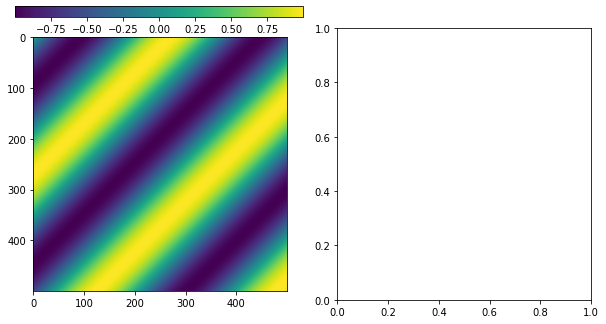

In [23]:
#Resetting as usual and making the graphs on the left, last time now!
Fig,ax,ax2,ims = Make_The_Plots()
cbar_ax = Fig.add_axes([0.1,0.91,0.4,0.03])

cbar = Fig.colorbar(ims, #Defined as 'mappable', basically the plot to use for the colorbar limits
             cax=cbar_ax, #Axes object to place it in
             orientation='horizontal') #We want this to be horizontal, or we'd get a very short and wide one

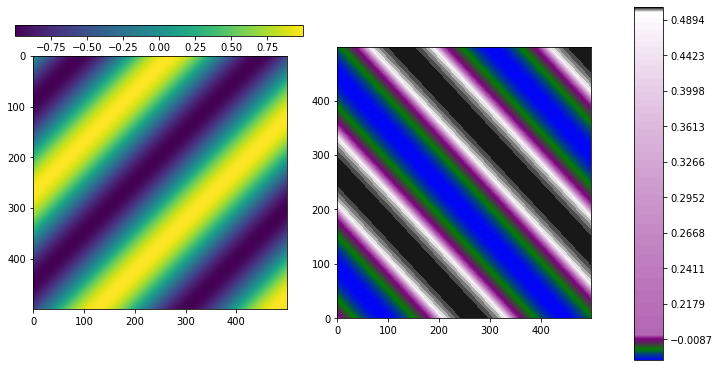

In [24]:
#A final demonstration on contour, where you can really change a colourbar however you like by specifying
#the contour levels

#Here, we'll draw them so that most contour values are focussed in a small region.
#It allows us to show largely the same data as above, but with a very different looking colourbar
#There may be niche cases you want to show this, especially if you end up making a colourmap with loads of colours
#The choice is yours
clevels = np.logspace(np.log10(0.2),np.log10(0.5),300)
clevels = np.append(np.linspace(-1,0.2,24),clevels)
clevels = np.append(clevels,np.array([0.6,0.7,0.8,0.9,1]))

cont2 = ax2.contourf(newdat,cmap=my_cmap,levels = clevels,vmin=-1,vmax=1)
cbar_ax2 = Fig.add_axes([0.96,0.01,0.04,0.98])
cbar2 = Fig.colorbar(cont2,cbar_ax2)
Fig